In [ ]:
from math import sqrt
from random import seed
from random import randrange
from csv import reader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


In [ ]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [ ]:

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 0, Got 0.


In [ ]:
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		# print(predicted)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores


# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)

In [ ]:
# Test the kNN on the Iris Flowers dataset
seed(1)
filename = '/content/Mall_Customers_Labeled.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 10
num_neighbors = 5
scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [94.73684210526315, 94.73684210526315, 100.0, 100.0, 100.0, 94.73684210526315, 94.73684210526315, 84.21052631578947, 94.73684210526315, 89.47368421052632]
Mean Accuracy: 94.737%


In [ ]:
# prompt: help me to build a classifier base on the K-nearest-neighbors algorithm, and write code to test the classifier.


# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
  neighbors = get_neighbors(train, test_row, num_neighbors)
  output_values = [row[-1] for row in neighbors]
  prediction = max(set(output_values), key=output_values.count)
  return prediction

class KNN:
  def __init__(self, num_neighbors):
    self.num_neighbors = num_neighbors

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X_test):
    predictions = []
    for row in X_test:
      output = predict_classification(self.X_train, row, self.num_neighbors)
      predictions.append(output)
    return(predictions)



In [ ]:
# Test the kNN on the Mall_Customers dataset
seed(1)
filename = '/content/Mall_Customers_Labeled.csv' # Assuming you have the Mall_Customers dataset in a file named 'Mall_Customers_Labeled.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
#str_column_to_int(dataset, len(dataset[0])-2)

# Split the dataset into train and test sets (example using 80/20 split)
train_size = int(0.8 * len(dataset))
train_set = dataset[:train_size]
test_set = dataset[train_size:]

# Prepare data for the KNN classifier
X_train = [row[:] for row in train_set]
y_train = [row[-1] for row in train_set]
X_test = [row[:] for row in test_set]
y_test = [row[-1] for row in test_set]

# Create and fit the KNN classifier
knn = KNN(num_neighbors=4)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
			print("Actual: " + str(actual[i]) + ' vs Predicted:' + str(predicted[i]))
	return correct / float(len(actual)) * 100.0

# Evaluate the model (example using accuracy)
accuracy = accuracy_metric(y_test, y_pred)
print('Accuracy: %.3f%%' % accuracy)

Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above Average
Actual: Rich vs Predicted:Rich
Actual: Above Average vs Predicted:Above

In [ ]:
# Create a new data point
new_data = [1, 35, 20, 20]  # Example values for the new data point

# Make a prediction for the new data point
prediction = knn.predict([new_data])

# Print the prediction
print('Prediction for new data:', prediction)


Prediction for new data: ['Below Average']


In [ ]:

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Accuracy: 0.95
Precision: 1.0
Recall: 0.95
F1-score: 0.9736842105263157


In [ ]:
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy}")
print(f"Accuracy on test data: {test_accuracy}")

Accuracy on training data: 0.9493670886075949
Accuracy on test data: 0.95


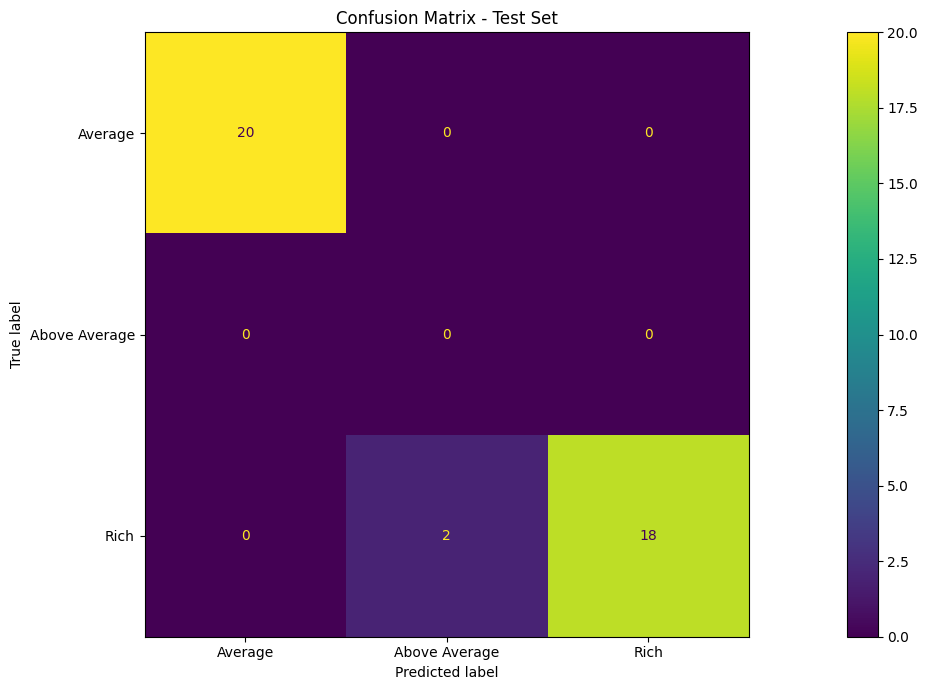

In [ ]:

# Define the label mapping
labels = {0: 'Poor', 1: 'Average', 2: 'Below Average', 3: 'Above Average', 4: 'Rich'}

# Find unique labels in the test predictions
unique_labels_test = set(y_test).union(set(test_predictions))

# Convert unique labels to lowercase for consistency
unique_labels_test = {label.lower() for label in unique_labels_test}

# Get the label names for the unique classes, handling potential missing labels
label_names_test = [labels.get(i, 'Unknown') for i in range(5) if labels.get(i, '').lower() in unique_labels_test]

# Calculate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix for the test set
fig, ax = plt.subplots(figsize=(20, 7))
ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=label_names_test).plot(ax=ax)
ax.set_title("Confusion Matrix - Test Set")

plt.tight_layout()
plt.show()


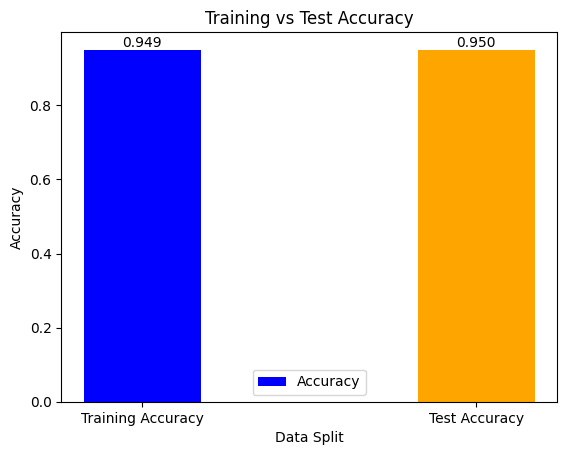

In [ ]:


def plot_accuracy(train_accuracy, test_accuracy):
    labels = ['Training Accuracy', 'Test Accuracy']
    accuracies = [train_accuracy, test_accuracy]

    fig, ax = plt.subplots()
    bar_width = 0.35
    index = range(len(labels))

    bars = ax.bar(index, accuracies, bar_width, color=['blue', 'orange'], label='Accuracy')

    ax.set_xlabel('Data Split')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training vs Test Accuracy')
    ax.set_xticks(index)
    ax.set_xticklabels(labels)
    ax.legend()

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

    plt.show()
plot_accuracy(train_accuracy, test_accuracy)

>1, train: 1.000, test: 1.000
>2, train: 0.975, test: 0.950
>3, train: 0.981, test: 0.975
>4, train: 0.949, test: 0.950
>5, train: 0.962, test: 0.975
>6, train: 0.949, test: 0.975
>7, train: 0.956, test: 0.975
>8, train: 0.949, test: 0.975
>9, train: 0.949, test: 0.975
>10, train: 0.949, test: 0.975
>11, train: 0.956, test: 0.975
>12, train: 0.949, test: 0.950
>13, train: 0.949, test: 0.975
>14, train: 0.949, test: 0.950
>15, train: 0.949, test: 0.975
>16, train: 0.949, test: 0.950
>17, train: 0.956, test: 0.950
>18, train: 0.949, test: 0.950
>19, train: 0.949, test: 0.950
>20, train: 0.949, test: 0.950
>21, train: 0.949, test: 0.950
>22, train: 0.949, test: 0.950
>23, train: 0.943, test: 0.950
>24, train: 0.937, test: 0.925
>25, train: 0.943, test: 0.950
>26, train: 0.943, test: 0.925
>27, train: 0.943, test: 0.925
>28, train: 0.937, test: 0.900
>29, train: 0.937, test: 0.875
>30, train: 0.905, test: 0.525
>31, train: 0.899, test: 0.525
>32, train: 0.886, test: 0.500
>33, train: 0.880

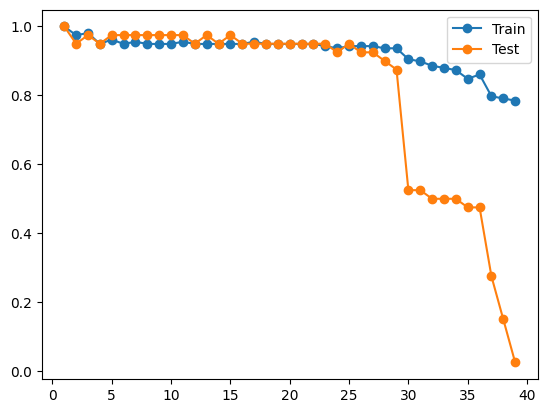

In [ ]:
# evaluate knn performance on train and test sets with different numbers of neighbors

# create dataset
#X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()


# define the tree depths to evaluate
values = [i for i in range(1, 40)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNN(num_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()